# Stock Price Forecasting using LSTM

## Introduction
This project demonstrates how to predict stock prices using a Long Short-Term Memory (LSTM) neural network. The code fetches historical stock price data, performs technical analysis, prepares the data for training, trains an LSTM model and evaluates the model's performance on the test data. It can be used to predict future stock prices, demonstrating the application of deep learning techniques in the field of finance.

## Table of Contents
1. [Data Collection and Visualization](#Data-Collection-and-Visualization)
2. [Moving Averages and Exponential Moving Averages](#Moving-Averages-and-Exponential-Moving-Averages)
3. [Relative Strength Index (RSI)](#Relative-Strength-Index)
4. [Moving Average Convergence Divergence (MACD)](#Moving-Average-Convergence-Divergence)
5. [Data Preprocessing and Model Preparation](#Data-Preprocessing-and-Model-Preparation)
6. [LSTM Model Architecture](#LSTM-Model-Architecture)
7. [Model Training](#Model-Training)
8. [Model Evaluation](#Model-Evaluation)
9. [Model Forecasting](#Model-Forecasting)
10. [Conclusion](#Conclusion)

In [1]:
# Data manipulation and analysis
import numpy as np # For numerical operations
import pandas as pd # For data manipulation and analysis in tabular format

# Data visualization
import matplotlib.pyplot as plt # Creating charts and visualizations

# Financial data retrieval
import yfinance as yf # For downloading historical stock data

# Date and time manipulation
import datetime # For handling dates and times

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler # For scaling data

# Machine learning and deep learning
import tensorflow as tf # Deep learning framework
from tensorflow.keras.layers import Dense, Dropout, LSTM # For building neural networks
from tensorflow.keras.optimizers import Adam # Optimizer for model training

## 1. Data Collection and Visualization <a class="anchor" id="Data-Collection-and-Visualization"></a>
Libraries Used: numpy, pandas, matplotlib, yfinance

**Steps:**

1. Define the start and end dates for the data you want to pull from the stock market.
2. Define the stock symbol (TSLA for Tesla in this case).
3. Use the yfinance library to fetch the historical stock price data for the specified period.
4. Visualize the fetched stock data by plotting the closing price trend over the specified date range using matplotlib.

This step provides an initial understanding of the stock's historical price movements and trends.

In [3]:
# Define the start and end dates for the data you want to pull
start_date = datetime.datetime(2013, 1, 1)
end_date = datetime.datetime.now()

# Define the stock symbol (TSLA for Tesla)
stock_symbol = 'TSLA'

# Use the yfinance library to fetch the data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the fetched stock data
print(stock_data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-02    2.333333    2.363333    2.314000    2.357333    2.357333   
2013-01-03    2.345333    2.363333    2.316667    2.318000    2.318000   
2013-01-04    2.320000    2.320000    2.261333    2.293333    2.293333   
2013-01-07    2.320000    2.320000    2.260000    2.289333    2.289333   
2013-01-08    2.300000    2.300000    2.207333    2.245333    2.245333   
...                ...         ...         ...         ...         ...   
2023-08-17  226.059998  226.740005  218.830002  219.220001  219.220001   
2023-08-18  214.119995  217.580002  212.360001  215.490005  215.490005   
2023-08-21  221.550003  232.130005  220.580002  231.279999  231.279999   
2023-08-22  240.250000  240.820007  229.550003  233.190002  233.190002   
2023-08-23  229.339996  235.179993  229.289

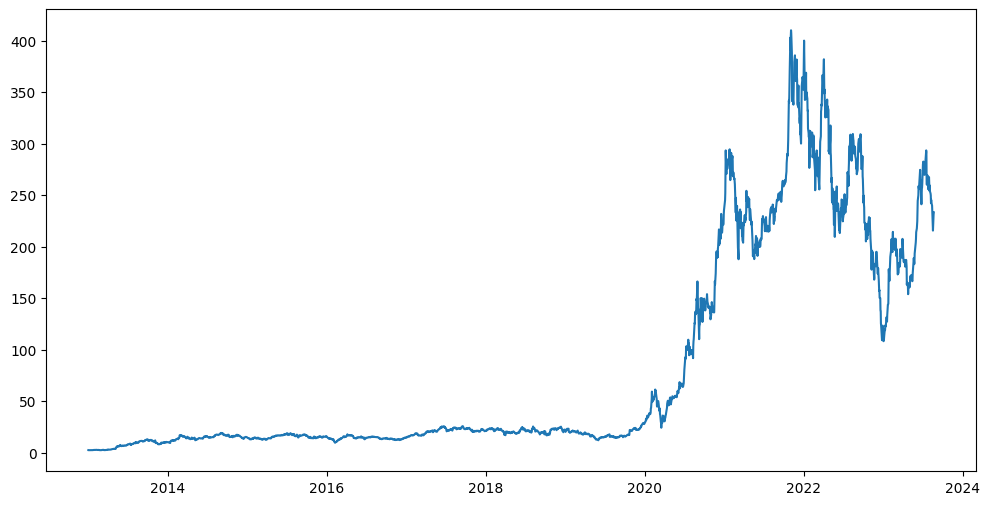

In [3]:
# Plot the closing price trend
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
plt.show()

## 2. Moving Averages and Exponential Moving Averages <a class="anchor" id="Moving-Averages-and-Exponential-Moving-Averages"></a>
Libraries Used: numpy, pandas, matplotlib

**Steps:**

1. Calculate the 50-day and 200-day simple moving averages (SMA) of the stock's closing price. This helps to smoothen out short-term fluctuations and provides a longer-term trend.
2. Compute the exponential moving averages (EMA) with window sizes of 50 and 200 days. EMAs give more weight to recent prices, making them sensitive to recent changes in the stock price.
3. Plot the stock's closing price, 50-day SMA, 200-day SMA, 50-day EMA and 200-day EMA charts.

This step helps in identifying potential crossovers between shorter and longer-term moving averages, which are often used as signals in technical analysis.

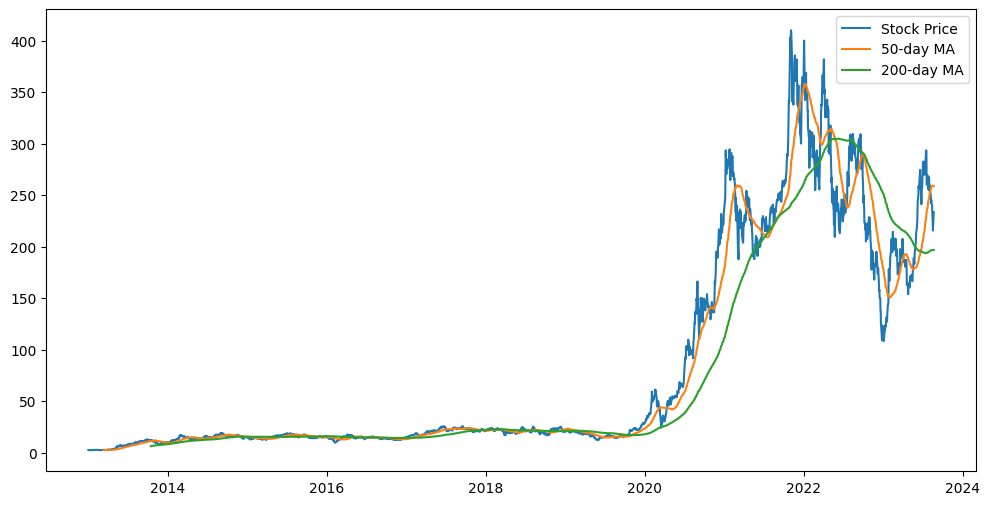

In [4]:
# Calculate 50-day and 200-day moving averages
ma_50 = stock_data['Close'].rolling(window=50).mean()
ma_200 = stock_data['Close'].rolling(window=200).mean()

# Plot the close price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
plt.plot(stock_data.index, ma_50, label='50-day MA')
plt.plot(stock_data.index, ma_200, label='200-day MA')
plt.legend()
plt.show()

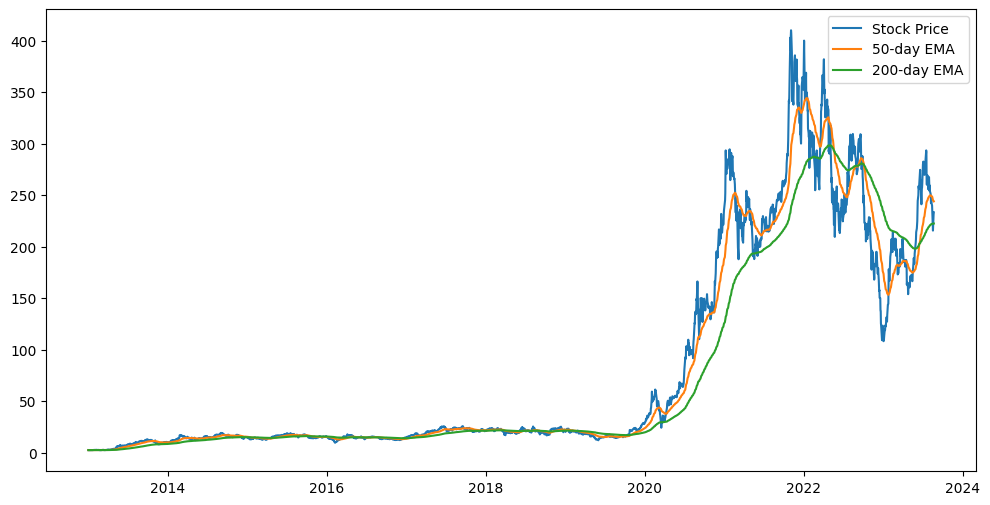

In [5]:
# Calculate the exponential moving average (EMA)
def compute_ema(data, window):
    return data.ewm(span=window, adjust=False).mean()

# Define the EMA windows
ema_50 = compute_ema(stock_data['Close'], window=50)
ema_200 = compute_ema(stock_data['Close'], window=200)

# Plot the close price and exponential moving averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
plt.plot(stock_data.index, ema_50, label='50-day EMA')
plt.plot(stock_data.index, ema_200, label='200-day EMA')
plt.legend()
plt.show()

## 3. Relative Strength Index (RSI) <a class="anchor" id="Relative-Strength-Index"></a>
Libraries Used: pandas, matplotlib

**Steps:**

1. Define the period for RSI calculation (typically 14 days).
2. Calculate the daily change in the stock's closing price (delta).
3. Separate gains (positive changes) and losses (negative changes) based on whether delta is positive or negative.
4. Calculate the average gains and average losses over the specified period (rolling mean).
5. Compute the Relative Strength (RS) by dividing the average gains by average losses.
6. Calculate the RSI as 100 minus (100 divided by (1 + RS)).
7. Plot the RSI values along with overbought (70) and oversold (30) thresholds.

This step helps in identifying overbought and oversold conditions in the stock, which can be useful for making trading decisions.

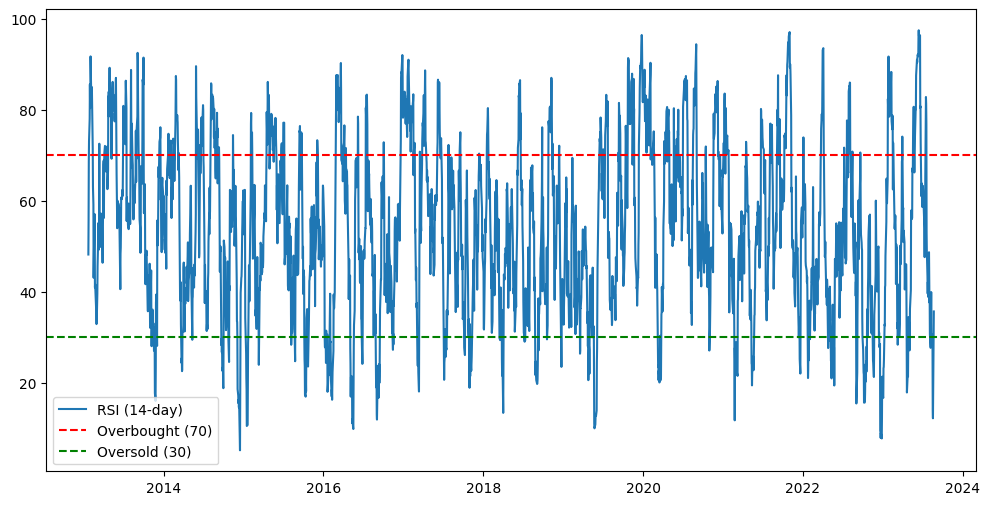

In [6]:
# Define the period for RSI calculation (typically 14 days)
rsi_period = 14

# Calculate the change in close prices (typically 'delta')
delta = stock_data['Close'].diff()

# Calculate gains (positive changes) and losses (negative changes)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Calculate the average gains and average losses over the specified period
avg_gain = gain.rolling(window=rsi_period).mean()
avg_loss = loss.rolling(window=rsi_period).mean()

# Calculate the Relative Strength (RS) and the Relative Strength Index (RSI)
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

# Plot the RSI values
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, rsi, label='RSI ({}-day)'.format(rsi_period))
plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
plt.legend()
plt.show()

## 4. Moving Average Convergence Divergence (MACD) <a class="anchor" id="Moving-Average-Convergence-Divergence"></a>
Libraries Used: pandas, matplotlib

**Steps:**

1. Define the short-term and long-term periods for MACD calculation (commonly 12-day and 26-day periods).
2. Calculate the short-term and long-term Exponential Moving Averages (EMA) of the stock's closing price.
3. Compute the MACD line as the difference between the short-term EMA and the long-term EMA.
4. Calculate the Signal line, typically a 9-day EMA of the MACD.
5. Calculate the MACD histogram by subtracting the Signal line from the MACD line.
6. Plot the MACD line, Signal line and the MACD histogram.

This step helps in understanding the momentum and potential trend reversals in the stock's price movements.

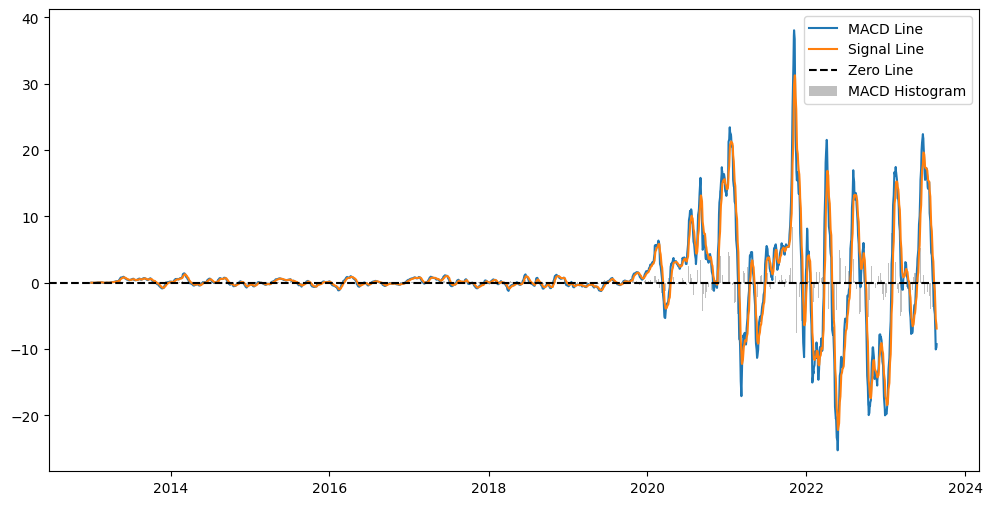

In [7]:
# Define the short-term and long-term periods for MACD calculation
short_period = 12
long_period = 26

# Calculate the short-term and long-term Exponential Moving Averages (EMA)
ema_short = stock_data['Close'].ewm(span=short_period, adjust=False).mean()
ema_long = stock_data['Close'].ewm(span=long_period, adjust=False).mean()

# Calculate the MACD line
macd_line = ema_short - ema_long

# Calculate the Signal line (typically a 9-day EMA of the MACD)
signal_line = macd_line.ewm(span=9, adjust=False).mean()

# Calculate the MACD histogram
macd_histogram = macd_line - signal_line

# Plot the MACD values
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, macd_line, label='MACD Line')
plt.plot(stock_data.index, signal_line, label='Signal Line')
plt.bar(stock_data.index, macd_histogram, label='MACD Histogram', color='grey', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', label='Zero Line')
plt.legend()
plt.show()

## 5. Data Preprocessing and Model Preparation <a class="anchor" id="Data-Preprocessing-and-Model-Preparation"></a>
Libraries Used: numpy, pandas, sklearn.preprocessing

**Steps:**

1. Check the shape of the stock data to understand the size of the dataset.
2. Split the data into training (75%) and testing (25%) sets.
3. Use MinMaxScaler to scale the training data, ensuring that all features are within the same scale (between 0 and 1).
4. Create input sequences (X_train) and target values (y_train) for training the LSTM model.

This step prepares the data for training the LSTM model, ensuring that the data is appropriately scaled and structured for the neural network.

In [8]:
# Check the shape of the stock data
stock_data.shape

(2678, 6)

In [3]:
# Split data into training and testing sets
data_training = pd.DataFrame(stock_data['Close'][0:int(len(stock_data)*0.75)])
data_testing = pd.DataFrame(stock_data['Close'][int(len(stock_data)*0.75):int(len(stock_data))])

# Check the shape of training and testing data
print(data_training.shape)
print(data_testing.shape)

(2009, 1)
(670, 1)


In [7]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)

In [11]:
# Prepare the training data (input sequences and target values)
def create_sequences(stock_data, sequence_length):
    X, y = [], []
    for i in range(len(stock_data) - sequence_length):
        X.append(stock_data[i:i+sequence_length])
        y.append(stock_data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 100
X_train, y_train = create_sequences(data_training_array, sequence_length)

In [12]:
X_train.shape

(1908, 100, 1)

## 6. LSTM Model Architecture <a class="anchor" id="LSTM-Model-Architecture"></a>
Libraries Used: tensorflow.keras

**Steps:**

1. Define a sequential LSTM model.
2. Add multiple LSTM layers with different numbers of units, followed by dropout layers to prevent overfitting.
3. The final dense layer has one unit to predict the next stock price.

This step sets up the architecture of the LSTM model, allowing the neural network to learn patterns in the sequential data.

In [13]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation='linear'))

In [14]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

## 7. Model Training <a class="anchor" id="Model-Training"></a>
Libraries Used: tensorflow.keras

**Steps:**

1. Compile the LSTM model with an optimizer and a suitable loss function.
2. Train the model using the training data (X_train, y_train) for a specified number of epochs.

This step trains the LSTM model on the training data, allowing the model to learn from historical price patterns.

In [15]:
# Compile the model
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
model.compile(optimizer=optimizer, loss = 'mean_squared_error',  metrics=['mean_absolute_error'])

# Train the model
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
60/60 [==============================] - 34s 423ms/step - loss: 0.0085 - mean_absolute_error: 0.0471
Epoch 2/50
60/60 [==============================] - 26s 428ms/step - loss: 0.0016 - mean_absolute_error: 0.0212
Epoch 3/50
60/60 [==============================] - 25s 417ms/step - loss: 9.6354e-04 - mean_absolute_error: 0.0161
Epoch 4/50
60/60 [==============================] - 24s 403ms/step - loss: 0.0012 - mean_absolute_error: 0.0190
Epoch 5/50
60/60 [==============================] - 26s 435ms/step - loss: 0.0011 - mean_absolute_error: 0.0179
Epoch 6/50
60/60 [==============================] - 24s 405ms/step - loss: 0.0012 - mean_absolute_error: 0.0187
Epoch 7/50
60/60 [==============================] - 433s 7s/step - loss: 0.0010 - mean_absolute_error: 0.0159
Epoch 8/50
60/60 [==============================] - 24s 400ms/step - loss: 0.0012 - mean_absolute_error: 0.0201
Epoch 9/50
60/60 [==============================] - 25s 423ms/step - loss: 9.2633e-04 - mean_absolute_

In [22]:
# Save the model
model.save('model.h5')

## 8. Model Evaluation <a class="anchor" id="Model-Evaluation"></a>
Libraries Used: numpy, pandas, sklearn.preprocessing, tensorflow.keras, matplotlib

**Steps:**

1. Prepare the testing data by combining the last 100 days of the training data with the testing data.
2. Scale the input data using the same MinMaxScaler used for the training data.
3. Create input sequences (X_test) and target values (y_test) for evaluating the model.
4. Make predictions using the trained LSTM model and scale the predictions back to the original price scale.
5. Plot the original and predicted prices for visual comparison.

This step evaluates the performance of the LSTM model on the test data and provides insights into the model's ability to predict stock prices.

In [16]:
# Prepare the testing data (input sequences and target values)
test_data_combined = pd.concat([data_training[-sequence_length:], data_testing])
test_data_scaled = scaler.transform(test_data_combined)

X_test, y_test = create_sequences(test_data_scaled, sequence_length)

In [17]:
# Make predictions using the trained model
y_predicted = model.predict(X_test)

21/21 [==============================] - 4s 133ms/step


In [18]:
# Scale back the predictions and true values
scale = scaler.scale_[0]
scale_factor = 1/scale
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

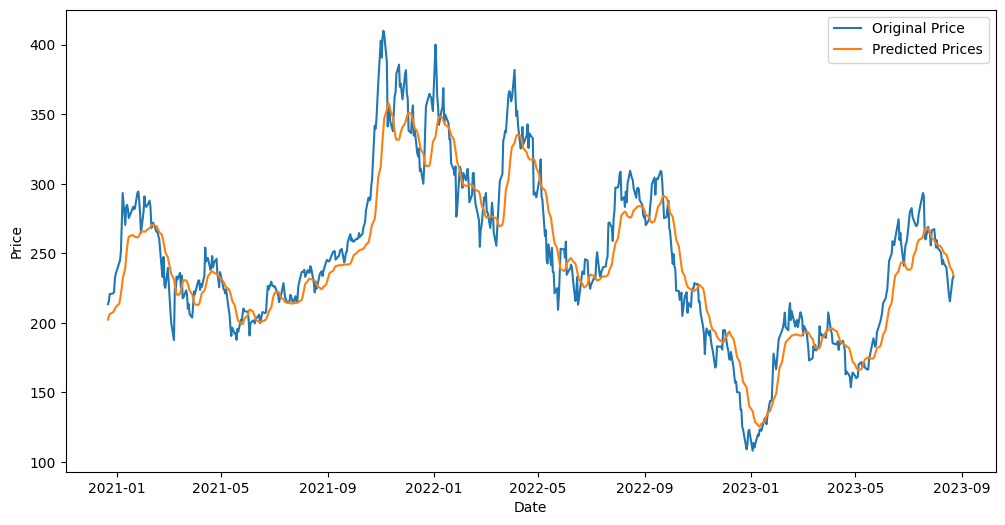

In [19]:
# Plot the original and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[-len(y_test):], data_testing['Close'], label='Original Price')
plt.plot(stock_data.index[-len(y_test):], y_predicted, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 9. Model Forecasting <a class="anchor" id="Model-Forecasting"></a>

Libraries Used: numpy, pandas, tensorflow.keras, matplotlib

**Steps:**
1. Combine the training and testing data to create a unified dataset.
2. Generate price forecasts for the next 30 days by initializing with the last sequence from the historical data and iteratively predicting the next day's closing price, rolling the sequence forward.
4. Create a date range for the forecasted values. This ensures that the forecasted prices are associated with specific dates.
5. Scale back the forecasted values.
6. Plot the original and forecasted prices for visual representation.

In [8]:
# Combine training and testing data
combined_data = pd.concat([data_training, data_testing])
combined_data_scaled = scaler.transform(combined_data)

In [5]:
# Make forecasts for the next 30 days
forecast_days = 30
last_sequence = combined_data_scaled[-sequence_length:]
forecast = []

for _ in range(forecast_days):
    next_pred = model.predict(last_sequence.reshape(1, sequence_length, 1))
    forecast.append(next_pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred[0, 0]

# Create date range for the forecast
forecast_dates = pd.date_range(start=stock_data.index[-1], periods=forecast_days + 1, closed='right')

1/1 [==============================] - 0s 54ms/step


C:\Users\Dell\AppData\Local\Temp\ipykernel_3140\4066356773.py:13: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=stock_data.index[-1], periods=forecast_days + 1, closed='right')


In [6]:
# Scale back the forecast values
scale = scaler.scale_[0]
scale_factor = 1/scale
forecast = np.array(forecast) * scale_factor

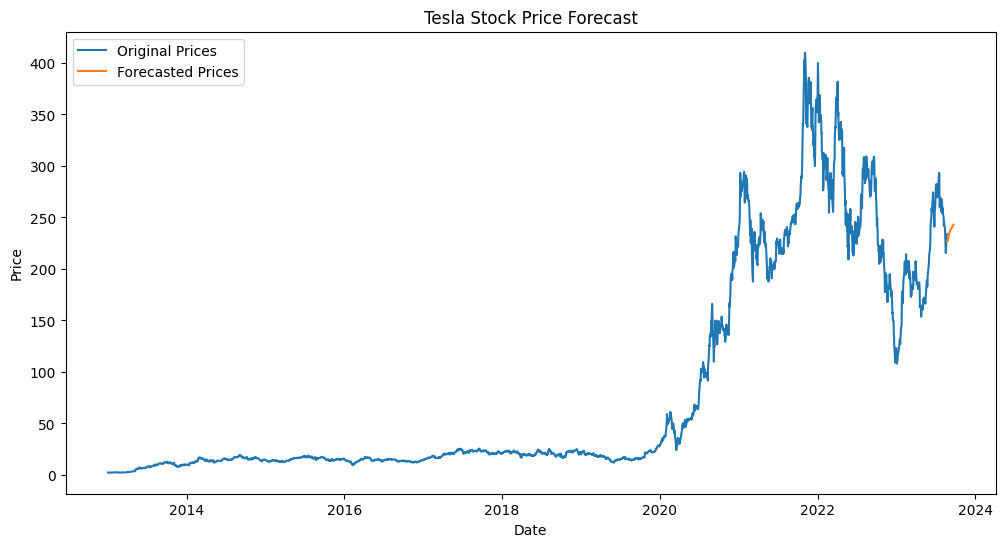

In [7]:
# Plot original prices and forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Original Prices')
plt.plot(forecast_dates, forecast, label='Forecasted Prices')
plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 10. Conclusion <a class="anchor" id="Conclusion"></a>
This project demonstrates the use of LSTM neural networks for stock price prediction. The combination of technical analysis indicators, data preprocessing and deep learning allows the model to capture patterns and trends in historical stock price data. The LSTM model's performance on the test data provides valuable insights into its effectiveness in predicting stock prices. Further refinement and tuning of the model can be done to improve its accuracy and predictive power.

**Note:** The documentation provides a comprehensive overview of each step in the stock price prediction project. For a deeper understanding of specific code segments, parameters and hyperparameters, refer to the code comments and the documentation of the respective libraries used.